In [12]:
import pandas as pd
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
data=pd.read_csv("titanic-passengers.csv",sep=";")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
data['Survived']=data['Survived'].map({'Yes':0,'No':1})
data['Sex']=data['Sex'].map({'male':0,'female':1})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
887,61,1,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,NaN,C
888,535,1,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,NaN,S
889,102,1,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,NaN,0,0,349215,7.8958,NaN,S


In [3]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Cabin'].fillna(data['Cabin'].mode(),inplace=True)
data['Cabin'].fillna(data['Embarked'].mode(),inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
x = data[['Parch','Sex','Age']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
lr=logreg.score(x_test,y_test)
lr

Accuracy=0.77


0.7703081232492998

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

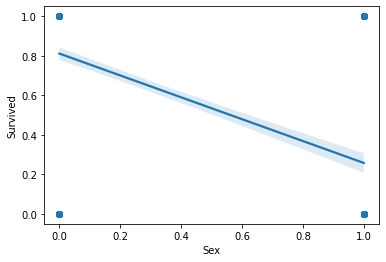

In [7]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=data)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

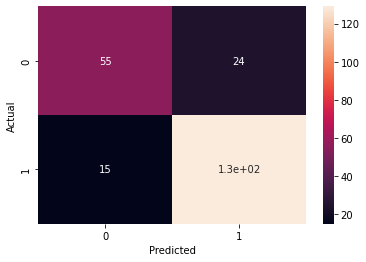

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
pred_prob=clf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:, 1])

0.7885460618846695

C:\Users\elbootic.com\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


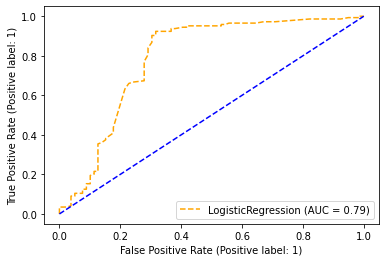

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Visualisation de la courbe ROC
metrics.plot_roc_curve(clf, x_test, y_test, linestyle='--', color='orange')
#Courbe ROC pour fpr=tpr
random_probs = [0 for i in range(len(y_test))] #Génère des 0 y_test fois
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=40)
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("accuracy=",accuracy_score(y_pred,y_test))

accuracy= 0.7198879551820728


In [14]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.68
Accuracy for k= 2 is: 0.68
Accuracy for k= 3 is: 0.67
Accuracy for k= 4 is: 0.67
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.68
Accuracy for k= 7 is: 0.71
Accuracy for k= 8 is: 0.71
Accuracy for k= 9 is: 0.69
Accuracy for k= 10 is: 0.69
Accuracy for k= 11 is: 0.7
Accuracy for k= 12 is: 0.71
Accuracy for k= 13 is: 0.72
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.72
Accuracy for k= 16 is: 0.71
Accuracy for k= 17 is: 0.72
Accuracy for k= 18 is: 0.72
Accuracy for k= 19 is: 0.73
Accuracy for k= 20 is: 0.74
Accuracy for k= 21 is: 0.73
Accuracy for k= 22 is: 0.72
Accuracy for k= 23 is: 0.72
Accuracy for k= 24 is: 0.73
Accuracy for k= 25 is: 0.75
Accuracy for k= 26 is: 0.73
Accuracy for k= 27 is: 0.75
Accuracy for k= 28 is: 0.71
Accuracy for k= 29 is: 0.75


In [15]:
kn=scores[21]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=9)
tree1 = DecisionTreeClassifier()
tree1.fit(x_train,y_train)
y_pred=tree1.predict(x_test)
score1=accuracy_score(y_test,y_pred)
score1

0.7563025210084033

In [16]:
tree2 = DecisionTreeClassifier(criterion="entropy", splitter="random")
tree2.fit(x_train,y_train)
y_pred=tree2.predict(x_test)
score2=accuracy_score(y_test,y_pred)
score2

0.7535014005602241

In [17]:
dt=score2
clf=RandomForestClassifier(n_estimators=85)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
rf=metrics.accuracy_score(y_test, y_pred)
rf

0.7563025210084033

score:0.7450980392156863
|--- feature_1 <= 0.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_2 <= 0.91
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.91
|   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |   |--- feature_2 <= 5.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  5.00
|   |   |   |   |   |   |   |--- feature_2 <= 6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  6.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 7.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feat

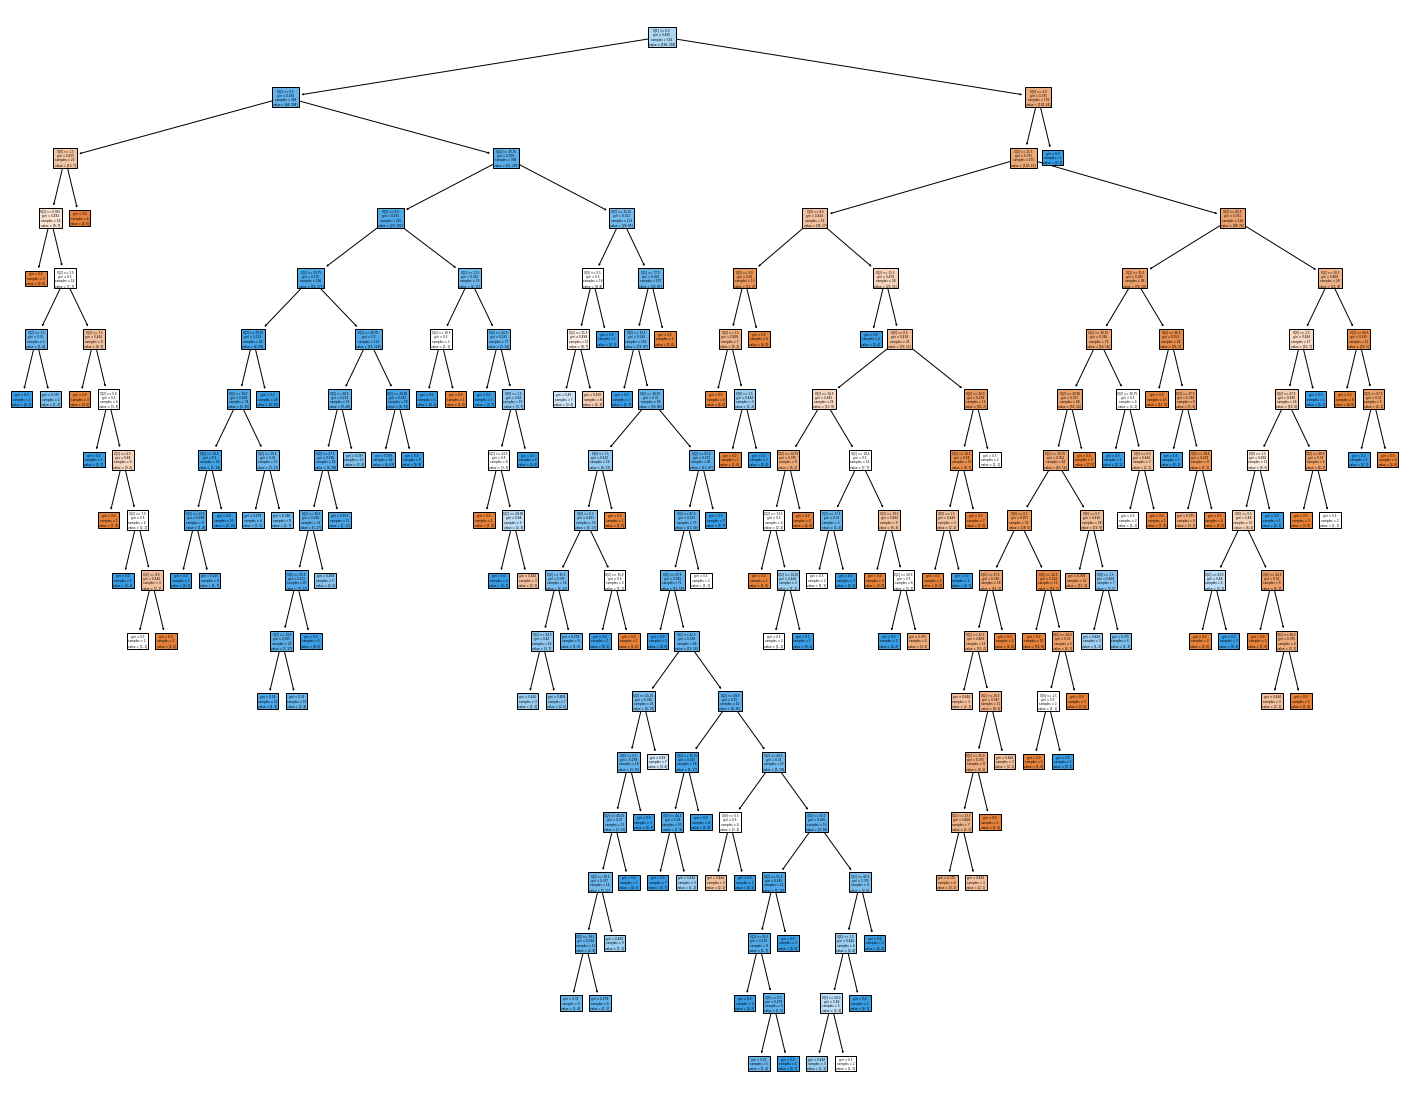

In [18]:
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

Text(0, 0.5, 'Accuracy')

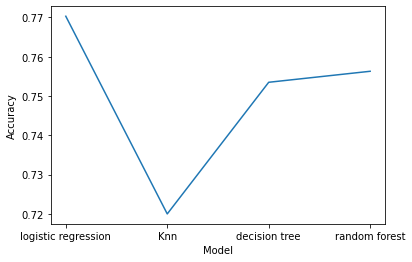

In [21]:
plt.plot(['logistic regression','Knn','decision tree', 'random forest'],[lr, kn, dt, rf])
plt.xlabel('Model')
plt.ylabel('Accuracy')